<a href="https://colab.research.google.com/github/efsiul/Model-Severity-Accidents/blob/main/05_MODELO_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes:**

Luis Felipe Cadavid Chica - 98711955 - Ingenieria de Sistemas.

Cristian Alexander Castaño Montoya - 1001409163 - Ingenieria de Sistemas.

Importing the Pandas library for dataset management and management. Then the dataset that was downloaded from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv is read.

In [ ]:
# Carga nuestros datos reducidos desde GitHub
! git clone https://github.com/efsiul/Model-Severity-Accidents

fatal: la ruta de destino 'Model-Severity-Accidents' ya existe y no es un directorio vacío.


## **01. INICIANDO CARGANDO DATASET Y LIBRERIAS**

## Importación de librerias

In [ ]:
import time
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer 
from scipy.spatial.distance import cdist 
from scipy.stats import skew, norm
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

## Cargamos nuestro dataset

In [ ]:
#Leemos nuestros datos
df = pd.read_csv('Reduced_dataset.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,28.260315,-81.437122,0.201,Stationary traffic on US-92 W - US-17 S from O...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-270134,2,2021-12-12 06:17:38,2021-12-12 09:02:47,47.461591,-92.901602,47.477781,-92.902962,1.120,Construction on US-169 near COUNTY HWY-5 Drive...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-2689947,2,2018-02-12 07:34:42,2018-02-12 13:34:42,37.694424,-122.103225,37.694424,-122.103225,0.000,At 163rd Ave/164th Ave/Carolyn St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-191424,2,2017-05-19 17:14:48,2017-05-19 23:14:48,42.706440,-73.830750,42.713740,-73.819670,0.756,At RT-5/Wolf Rd/Exit 2 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2142330,2,2020-06-24 18:29:14,2020-06-24 18:59:14,43.034760,-89.409920,43.034760,-89.409920,0.000,At CR-D/Fish Hatchery Rd/Exit 260 - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,40.723675,-74.089130,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-743880,2,2021-03-24 05:18:30,2021-03-24 13:54:34,25.809384,-80.323373,25.809874,-80.329373,0.375,Stationary traffic on FL-948 from FL-826/Palme...,...,False,False,False,False,False,False,Night,Night,Night,Night
99997,A-1108176,2,2021-08-16 16:24:24,2021-08-16 17:05:25,38.292666,-77.479169,38.290757,-77.471943,0.413,Stationary traffic on VA-3 - US-1 Bus N from W...,...,False,False,False,False,False,False,Day,Day,Day,Day
99998,A-2255283,2,2020-04-13 19:09:00,2020-04-13 20:07:19,39.622410,-105.195060,39.622450,-105.195010,0.004,At CR-120/S Parmalee Gulch Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## **02. PRE-PROCESAMIENTO**

## Eliminar datos duplicados:

In [ ]:
df.drop_duplicates(inplace=True)
df


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,28.260315,-81.437122,0.201,Stationary traffic on US-92 W - US-17 S from O...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-270134,2,2021-12-12 06:17:38,2021-12-12 09:02:47,47.461591,-92.901602,47.477781,-92.902962,1.120,Construction on US-169 near COUNTY HWY-5 Drive...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-2689947,2,2018-02-12 07:34:42,2018-02-12 13:34:42,37.694424,-122.103225,37.694424,-122.103225,0.000,At 163rd Ave/164th Ave/Carolyn St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-191424,2,2017-05-19 17:14:48,2017-05-19 23:14:48,42.706440,-73.830750,42.713740,-73.819670,0.756,At RT-5/Wolf Rd/Exit 2 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2142330,2,2020-06-24 18:29:14,2020-06-24 18:59:14,43.034760,-89.409920,43.034760,-89.409920,0.000,At CR-D/Fish Hatchery Rd/Exit 260 - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,40.723675,-74.089130,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-743880,2,2021-03-24 05:18:30,2021-03-24 13:54:34,25.809384,-80.323373,25.809874,-80.329373,0.375,Stationary traffic on FL-948 from FL-826/Palme...,...,False,False,False,False,False,False,Night,Night,Night,Night
99997,A-1108176,2,2021-08-16 16:24:24,2021-08-16 17:05:25,38.292666,-77.479169,38.290757,-77.471943,0.413,Stationary traffic on VA-3 - US-1 Bus N from W...,...,False,False,False,False,False,False,Day,Day,Day,Day
99998,A-2255283,2,2020-04-13 19:09:00,2020-04-13 20:07:19,39.622410,-105.195060,39.622450,-105.195010,0.004,At CR-120/S Parmalee Gulch Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Eliminar todas las filas con valores faltantes:

In [ ]:
df.dropna(inplace=True)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,28.260315,-81.437122,0.201,Stationary traffic on US-92 W - US-17 S from O...,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-1441160,2,2021-11-02 03:16:00,2021-11-02 04:33:30,30.499671,-91.141074,30.502041,-91.141152,0.164,Incident on N FOSTER DR near HOLLYWOOD ST Expe...,...,False,False,False,False,True,False,Night,Night,Night,Night
7,A-472662,2,2021-12-23 17:45:18,2021-12-23 21:10:39,28.450381,-81.399122,28.449707,-81.401108,0.129,Slow traffic on FL-482 - US-92 W - US-441 S - ...,...,False,False,False,False,False,False,Night,Day,Day,Day
15,A-1057215,2,2021-10-19 17:39:00,2021-10-19 19:40:34,33.962013,-118.231992,33.957410,-118.229918,0.340,Slow traffic from E 83rd St to Calden Ave due ...,...,False,False,False,False,False,False,Day,Day,Day,Day
17,A-2362363,2,2020-01-06 10:14:00,2020-01-06 11:27:36,33.977722,-118.075771,33.977722,-118.075771,0.000,At Saragosa St - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,A-1774938,2,2020-12-02 14:07:00,2020-12-03 02:04:30,39.957860,-75.608497,39.958806,-75.603472,0.274,Stationary traffic on US-322 Bus W - US-322 Bu...,...,False,False,False,False,True,False,Day,Day,Day,Day
99989,A-1560015,2,2021-02-08 23:39:09,2021-02-09 01:18:06,34.657186,-83.041877,34.655588,-83.039598,0.170,Incident on COMMERCE WAY near SC-11 Drive with...,...,False,False,False,False,False,False,Night,Night,Night,Night
99991,A-1495718,2,2021-11-17 16:05:00,2021-11-17 19:02:54,33.954708,-118.044731,33.952333,-118.041286,0.257,Slow traffic from Santa Fe Springs Rd (Mulberr...,...,False,False,False,False,False,False,Day,Day,Day,Day
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,40.723675,-74.089130,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,...,False,False,False,False,False,False,Day,Day,Day,Day


Como pudimos notar, perdimos bastantes datos, pero al tener un dataset tan grande, nos queda igual 33.306 rows que seran suficiente para nuestro modelo

## Selección de características basada en la correlación

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,0.201,Stationary traffic on US-92 W - US-17 S from O...,1682.0,Pleasant Hill Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-1441160,2,2021-11-02 03:16:00,2021-11-02 04:33:30,30.499671,-91.141074,0.164,Incident on N FOSTER DR near HOLLYWOOD ST Expe...,5098.0,Hollywood St,...,False,False,False,False,True,False,Night,Night,Night,Night
7,A-472662,2,2021-12-23 17:45:18,2021-12-23 21:10:39,28.450381,-81.399122,0.129,Slow traffic on FL-482 - US-92 W - US-441 S - ...,1631.0,Sand Lake Rd,...,False,False,False,False,False,False,Night,Day,Day,Day
15,A-1057215,2,2021-10-19 17:39:00,2021-10-19 19:40:34,33.962013,-118.231992,0.340,Slow traffic from E 83rd St to Calden Ave due ...,8404.0,S Alameda St,...,False,False,False,False,False,False,Day,Day,Day,Day
17,A-2362363,2,2020-01-06 10:14:00,2020-01-06 11:27:36,33.977722,-118.075771,0.000,At Saragosa St - Accident.,10882.0,Saragosa St,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,A-1774938,2,2020-12-02 14:07:00,2020-12-03 02:04:30,39.957860,-75.608497,0.274,Stationary traffic on US-322 Bus W - US-322 Bu...,299.0,W Market St,...,False,False,False,False,True,False,Day,Day,Day,Day
99989,A-1560015,2,2021-02-08 23:39:09,2021-02-09 01:18:06,34.657186,-83.041877,0.170,Incident on COMMERCE WAY near SC-11 Drive with...,7230.0,S Highway 11,...,False,False,False,False,False,False,Night,Night,Night,Night
99991,A-1495718,2,2021-11-17 16:05:00,2021-11-17 19:02:54,33.954708,-118.044731,0.257,Slow traffic from Santa Fe Springs Rd (Mulberr...,13222.0,Mulberry Dr,...,False,False,False,False,False,False,Day,Day,Day,Day
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,182.0,Lincoln Hwy,...,False,False,False,False,False,False,Day,Day,Day,Day


## Convertimos las variables categoricas en variables numericas usando la codificación One-Hot

Reducimos el dataset a 7000, porque el entorno de colab no nos da RAM suficiente para procesar más

In [ ]:
df = df.sample(n=7000, random_state=42)

In [ ]:
categoricas = list(df.select_dtypes(include=['object']))

In [ ]:
df = pd.get_dummies(df, columns=categoricas)

## Normalizamos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)


## **03 - MODELO NAIVE BAYES**

## Vamos a dividir los datos de entrenamiento y de test

In [ ]:
y=df['Severity'] #Variable a predecir
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)


## Creamos el modelo NAIVE BAYES

In [ ]:
# Crear el modelo
modelo_nb = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
modelo_nb.fit(X_train, y_train)

GaussianNB()

## Verificamos el accuracy de nuestro modelo

In [ ]:


# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_nb.predict(X_test)

# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)




In [ ]:
# Imprimir el accuracy del modelo
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.94


## Verificamos de otras maneras

<AxesSubplot:>

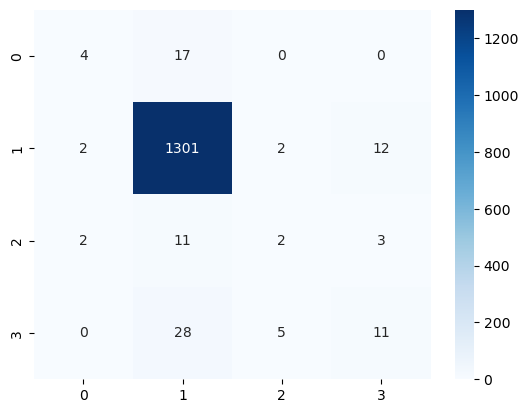

In [ ]:
# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_nb.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")


In [ ]:


# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_nb.predict(X_test)

# Calcular la precisión y el recall para cada clase
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Imprimir la precisión y el recall para cada clase
for i in range(len(precision)):
    print("Class {}: Precision: {:.2f}, Recall: {:.2f}".format(i, precision[i], recall[i]))


Class 0: Precision: 0.50, Recall: 0.19
Class 1: Precision: 0.96, Recall: 0.99
Class 2: Precision: 0.22, Recall: 0.11
Class 3: Precision: 0.42, Recall: 0.25


## **04. APLICANDO MODELO RANDOM FOREST**

## Cargamos las librerias que necesitaremos

## Vamos a dividir los datos de entrenamiento y de test

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
y=df['Severity'] #Variable a predecir
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

## Aplicamos el modelo de Random Forest

In [ ]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier()

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predecir en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9657142857142857


<AxesSubplot:>

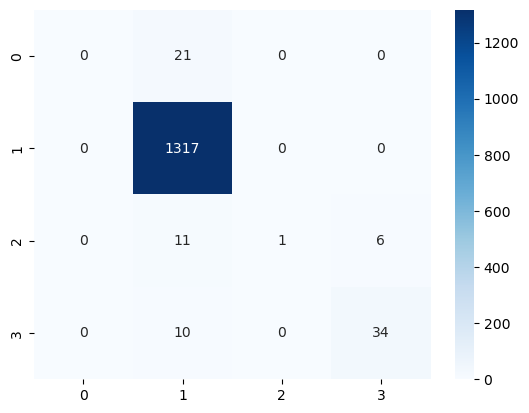

In [ ]:
# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_rf.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

In [ ]:
# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_rf.predict(X_test)

# Calcular la precisión y el recall para cada clase
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Imprimir la precisión y el recall para cada clase
for i in range(len(precision)):
    print("Class {}: Precision: {:.2f}, Recall: {:.2f}".format(i, precision[i], recall[i]))

Class 0: Precision: 0.00, Recall: 0.00
Class 1: Precision: 0.97, Recall: 1.00
Class 2: Precision: 1.00, Recall: 0.06
Class 3: Precision: 0.85, Recall: 0.77


/home/efsiul/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
